<a href="https://colab.research.google.com/github/priyal-khapra/Projects/blob/main/Language_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [ ]:
data["language"].value_counts()
# languages that this model can detect are given below

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [ ]:
x = np.array(data["Text"])
y = np.array(data["language"])


In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)
# model.score(X_test,y_test)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test,y_pred)
acc

0.9516666666666667

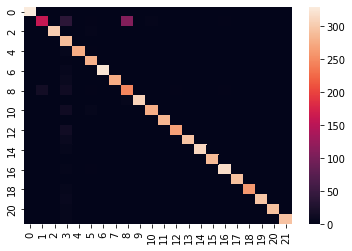

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm)

In [ ]:
from sklearn.metrics import classification_report 
cr = classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n      Arabic       1.00      0.99      1.00       332\n     Chinese       0.91      0.50      0.65       319\n       Dutch       0.99      0.98      0.99       308\n     English       0.67      1.00      0.80       291\n    Estonian       1.00      0.97      0.98       285\n      French       0.94      0.99      0.97       283\n       Hindi       1.00      0.98      0.99       330\n  Indonesian       0.99      0.97      0.98       286\n    Japanese       0.69      0.86      0.76       288\n      Korean       1.00      0.98      0.99       314\n       Latin       0.98      0.93      0.95       298\n     Persian       1.00      1.00      1.00       285\n   Portugese       0.99      0.94      0.96       284\n      Pushto       1.00      0.97      0.98       306\n    Romanian       0.99      0.98      0.99       318\n     Russian       1.00      0.99      0.99       290\n     Spanish       0.98      0.98      0.98       324\n     Sw

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Si el agua fuese belleza, tú serías el océano entero.
['Spanish']


In [ ]:
n = 1
while n == 1: 
  print("Enter 1 to enter a text for language detection")
  print("Enter 0 to exit")
  n = int(input("enter the number from the menu"))
  user = input("Enter a Text: ")
  data = cv.transform([user]).toarray()
  output = model.predict(data)
  print(output)

Enter 1 to enter a text for language detection
Enter 0 to exit
enter the number from the menu1
Enter a Text: Si yo fuera azafata, te llevaría en mi avión, pero como no lo soy, te llevo en mi corazón.
['Spanish']
Enter 1 to enter a text for language detection
Enter 0 to exit
enter the number from the menu0
Enter a Text: Di mana toilet?
['Indonesian']
